In [49]:
import pandas as pd
import numpy as np
imdb_df = pd.read_csv("./imdb_dataset_with_google_trends.csv")

In [50]:
imdb_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,publish_date,before_premiere_trends
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,2009-12-18,78.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,2007-05-25,9.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,2015-11-06,23.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,2012-07-20,72.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0,2015-12-18,0.0


In [51]:
len(imdb_df)

1607

In [52]:
imdb_df['title_year'].max()

2016.0

In [53]:
df_movie_imdb_link = imdb_df['movie_imdb_link']

In [54]:
movi_list = df_movie_imdb_link.to_list()

In [55]:
df_movie_imdb_link

0       http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1       http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2       http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3       http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4       http://www.imdb.com/title/tt5289954/?ref_=fn_t...
                              ...                        
1602    http://www.imdb.com/title/tt0345950/?ref_=fn_t...
1603    http://www.imdb.com/title/tt0327056/?ref_=fn_t...
1604    http://www.imdb.com/title/tt0405159/?ref_=fn_t...
1605    http://www.imdb.com/title/tt0122933/?ref_=fn_t...
1606    http://www.imdb.com/title/tt0332280/?ref_=fn_t...
Name: movie_imdb_link, Length: 1607, dtype: object

In [56]:
box_office = pd.read_csv("./MovieData/boxofficemojo_dataset/Mojo_budget_data.csv")

In [57]:
box_office.keys()

Index(['movie_id', 'movie_title', 'movie_year', 'director', 'writer',
       'producer', 'composer', 'cinematographer', 'main_actor_1',
       'main_actor_2', 'main_actor_3', 'main_actor_4', 'budget', 'domestic',
       'international', 'worldwide', 'mpaa', 'run_time', 'genre_1', 'genre_2',
       'genre_3', 'genre_4', 'link'],
      dtype='object')

In [58]:
imdb_df["movie_id"] = imdb_df.movie_imdb_link.str[26:35]


In [59]:
imdb_df["movie_id"].head()        

0    tt0499549
1    tt0449088
2    tt2379713
3    tt1345836
4    tt5289954
Name: movie_id, dtype: object

In [60]:
merged_df = pd.merge(imdb_df, box_office, on='movie_id')

mask = merged_df.country.str.contains('USA')
merged_df = merged_df.drop(index=merged_df[~mask].index)

merged_df = merged_df.drop(['movie_id', 'movie_title_x', 'num_user_for_reviews', 'plot_keywords'], axis=1)
merged_df = merged_df.drop(['domestic', 'international'], axis=1)
merged_df = merged_df.drop(['gross', 'language'], axis=1)
merged_df = merged_df.drop([ 'imdb_score','color'], axis=1)
merged_df = merged_df.drop(['main_actor_2', 'main_actor_3', 'main_actor_1', 'facenumber_in_poster'], axis=1)
# removing duplicates and urelated attributes
merged_df = merged_df.drop(['run_time', 'budget_y', 'director_name', 'title_year', 'link', 'movie_imdb_link', 'genres', 'num_voted_users', 'movie_title_y', 'num_critic_for_reviews', 'content_rating', 'country', 'aspect_ratio'], axis=1)

# merged_df = merged_df.drop(['genre_4', 'genre_3'], axis=1)

In [61]:
# The dollar had an average inflation rate of 2.10% per year between 2000 and 2016. Source: https://www.officialdata.org/2000-dollars-in-2016?amount=3900#:~:text=The%20dollar%20had%20an%20average,Labor%20Statistics%20consumer%20price%20index.
inflation = 1.021
for index, row in merged_df.iterrows():
    power = 2016 - row['movie_year']
    merged_df.at[index, 'budget_x'] = row['budget_x'] * (inflation ** power)
    merged_df.at[index, 'worldwide'] = row['worldwide'] * (inflation ** power)
    # merged_df.at[index, 'domestic']= row['domestic'] * (inflation ** power)
    # merged_df.at[index, 'international']= row['international'] * (inflation ** power)
    # merged_df.at[index, 'gross']= row['gross'] * (inflation ** power)
merged_df = merged_df.drop('movie_year', axis=1)

In [62]:
# merged_df[['budget_x', 'movie_year']].head()
len(merged_df)

898

In [63]:
# genre_1 = merged_df['genre_1'].unique()
# genre_2 = merged_df['genre_2'].unique()
# genre_3 = merged_df['genre_3'].unique()
# genre_4 = merged_df['genre_4'].unique()


# genres = np.concatenate((genre_1, genre_2, genre_3, genre_4), axis=0)

# genres = genres[~pd.isna(genres)]
# genres = np.unique(genres)

# for g in genres:
#     merged_df.insert(len(merged_df.columns), g, 0)

# for item, row in merged_df.iterrows():
#     for genre in genres:
#         if genre == row['genre_1']:
#             merged_df.at[item, genre] = 1
#         if genre == row['genre_2']:
#             merged_df.at[item, genre] = 1
#         if genre == row['genre_3']:
#             merged_df.at[item, genre] = 1
#         if genre == row['genre_4']:
#             merged_df.at[item, genre] = 1
# merged_df = merged_df.drop(['genre_2', 'genre_1', 'genre_3', 'genre_4'], axis=1)

In [44]:
merged_df = merged_df.drop(['genre_2', 'genre_1', 'genre_3', 'genre_4'], axis=1)

In [45]:
merged_df.keys()

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'actor_1_name',
       'cast_total_facebook_likes', 'actor_3_name', 'budget_x',
       'actor_2_facebook_likes', 'movie_facebook_likes', 'publish_date',
       'before_premiere_trends', 'director', 'writer', 'producer', 'composer',
       'cinematographer', 'main_actor_4', 'worldwide', 'mpaa'],
      dtype='object')

In [46]:
def normalize(df, feature):
    print(df[feature].mean())
    df[feature] = (df[feature]-df[feature].mean())/df[feature].std()
    # return df[feature].mean(), df[feature].std()
normalize(merged_df, 'cast_total_facebook_likes')
normalize(merged_df, 'actor_1_facebook_likes')
normalize(merged_df, 'budget_x')
normalize(merged_df, 'actor_2_facebook_likes')
normalize(merged_df, 'movie_facebook_likes')
normalize(merged_df, 'director_facebook_likes')
normalize(merged_df, 'actor_3_facebook_likes')
normalize(merged_df, 'duration')
# normalize(merged_df, 'movie_year')

17694.760579064587
11129.192650334076
96573591.67406026
3634.6815144766147
18024.880846325166
1291.7115812917596
1439.542316258352
114.95100222717149


In [64]:
len(merged_df)

898

In [29]:
mean_rev, std_rev = merged_df['worldwide'].mean(), merged_df['worldwide'].std()
normalize(merged_df, 'worldwide')

287661364.1688326


In [32]:
std_rev

301261245.93292725

In [33]:
mean_rev

287661364.1688326

/var/folders/bh/b3dbk3j96b72qw2kmjf9rqfw0000gn/T/ipykernel_25818/1526544185.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  C_mat = merged_df.corr()


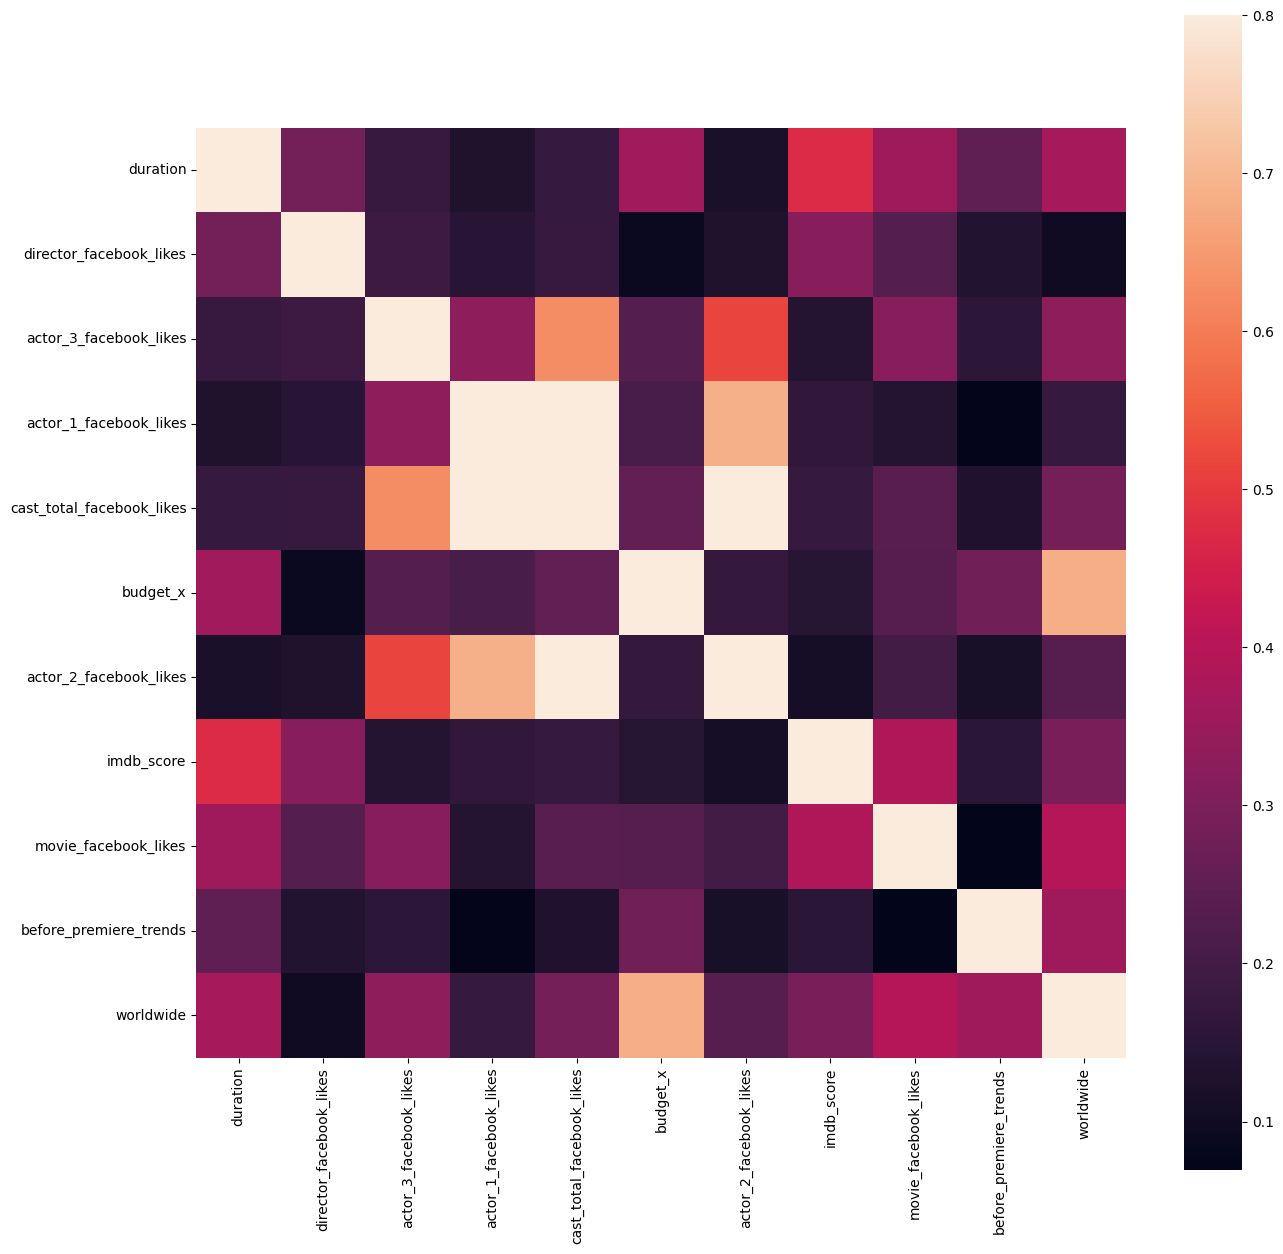

In [34]:
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
C_mat = merged_df.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [35]:
merged_df['imdb_score'].corr(merged_df['worldwide'])

0.2937977828936498

In [36]:
merged_df['director_facebook_likes'].corr(merged_df['worldwide'])

0.09905333602335473

In [31]:
merged_df.keys()

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'actor_1_name',
       'cast_total_facebook_likes', 'actor_3_name', 'budget_x',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes',
       'director', 'writer', 'producer', 'composer', 'cinematographer',
       'main_actor_4', 'worldwide', 'mpaa'],
      dtype='object')

In [23]:
# import seaborn as sns
# sns.heatmap(merged_df.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);
merged_df[merged_df.Romance == 1].shape[0]

332

<AxesSubplot: ylabel='Density'>

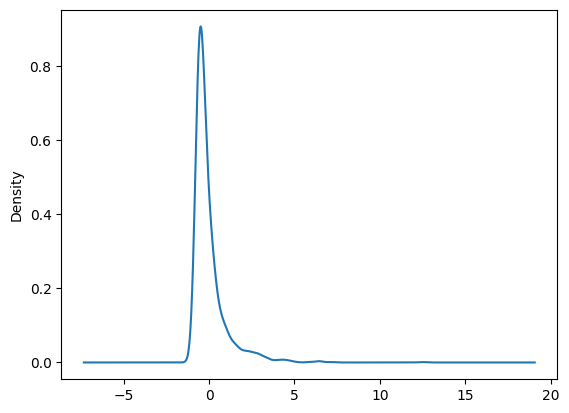

In [67]:
merged_df['worldwide'].plot(kind='kde')

<AxesSubplot: ylabel='Frequency'>

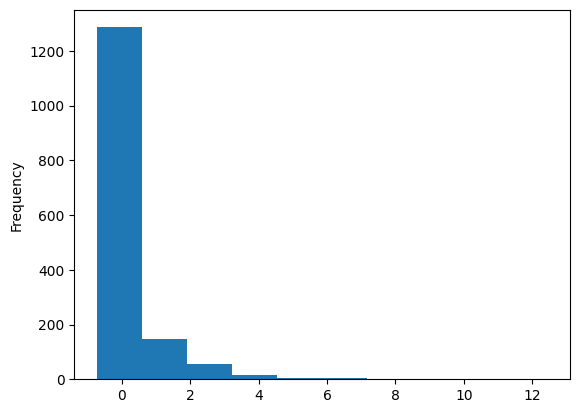

In [73]:
merged_df['worldwide'].plot(kind='hist')

<AxesSubplot: ylabel='Density'>

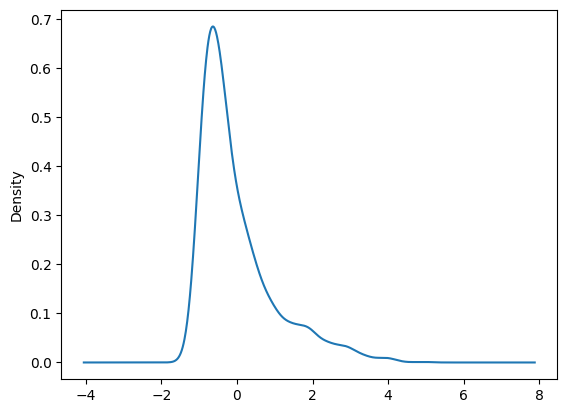

In [71]:
merged_df['budget_x'].plot(kind='kde')

<AxesSubplot: ylabel='Frequency'>

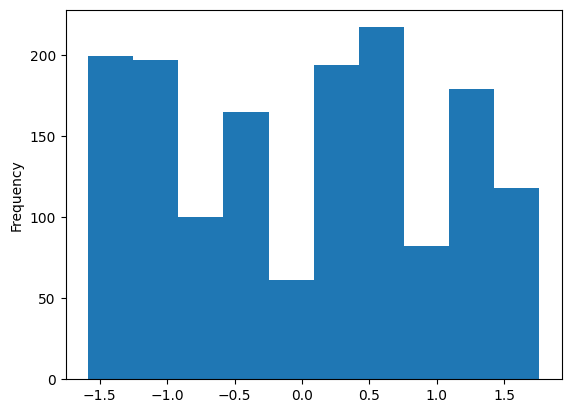

In [77]:
merged_df['movie_year'].plot(kind='hist')

In [40]:
merged_df = merged_df.drop(['imdb_score'], axis=1)

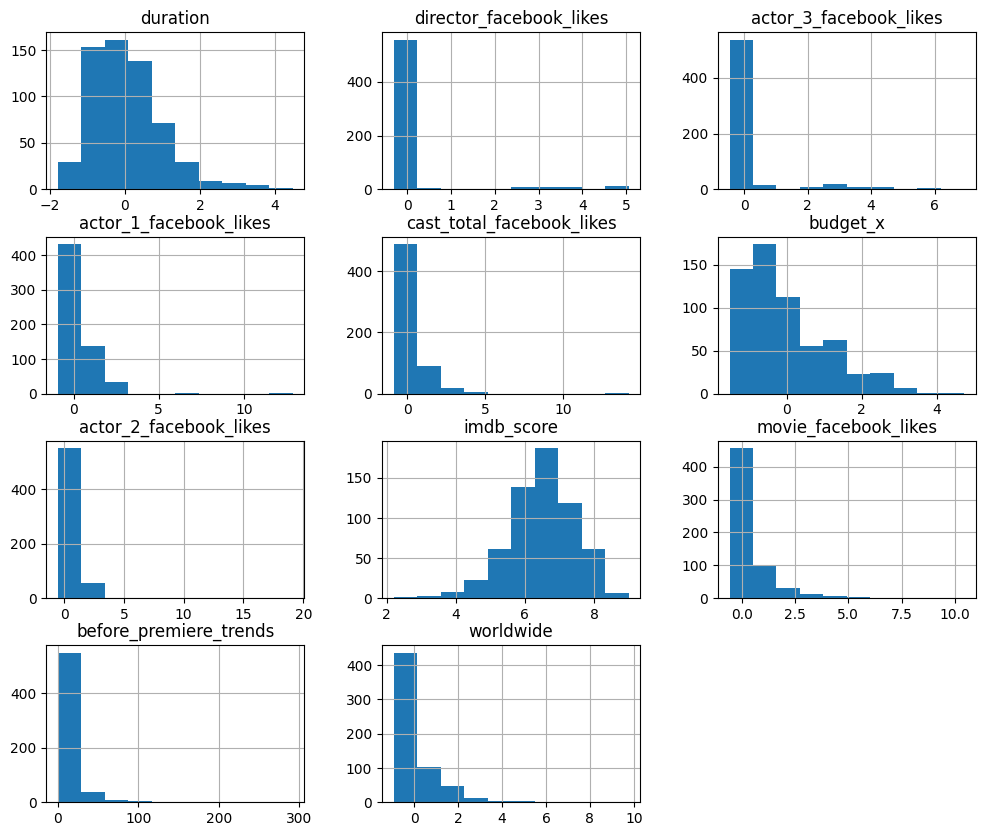

In [37]:
merged_df.hist(figsize = (12,10))
plt.show()

In [21]:
from sklearn import preprocessing
def to_categorical(df, feature):
    le = preprocessing.LabelEncoder()
    le.fit(df[feature].unique())
    feature_cat = le.transform(df[feature])
    df.drop([feature], axis=1)
    df[feature] = feature_cat
    # return df

In [22]:
def one_hot_encode(df, column):
    """
    One hot encodes a column in a pandas DataFrame.
    
    Args:
        df (pandas.DataFrame): The DataFrame to one hot encode.
        column (str): The name of the column to one hot encode.
        
    Returns:
        pandas.DataFrame: The one hot encoded DataFrame.
    """
    # Get the unique values in the column
    unique_values = df[column].unique()
    
    # Create a new DataFrame with one hot encoded columns
    one_hot_df = pd.get_dummies(df[column], prefix=column)
    
    # Add the new columns to the original DataFrame
    df = pd.concat([df, one_hot_df], axis=1)
    
    # Drop the original column from the DataFrame
    df.drop(column, axis=1, inplace=True)
    
    return df


In [24]:
to_categorical(merged_df, 'director')
to_categorical(merged_df, 'writer')
to_categorical(merged_df, 'producer')
to_categorical(merged_df, 'composer')
to_categorical(merged_df, 'cinematographer')
to_categorical(merged_df, 'main_actor_4')
to_categorical(merged_df, 'actor_2_name')
to_categorical(merged_df, 'actor_1_name')
to_categorical(merged_df, 'actor_3_name')
merged_df = one_hot_encode(merged_df, 'mpaa')
# to_categorical(merged_df, 'mpaa')
# to_categorical(merged_df, 'color')
# to_categorical(merged_df, 'language')

In [28]:
# drop_list = ['worldwide', 'cast_total_facebook_likes', 'actor_1_facebook_likes', 'budget_x', 'actor_2_facebook_likes', 'movie_facebook_likes', 'director_facebook_likes', 'actor_3_facebook_likes', 'worldwide_normalized']
x = merged_df.loc[:, merged_df.columns != 'worldwide']
y = merged_df['worldwide']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
print(mlr_diff.tail())

Prediction for test set: [-0.70017035 -0.60493729 -0.25871747 -0.9031329  -0.08958836  0.1804704
  0.49069281 -0.57151495 -0.63225653  0.12646334  0.37665754 -0.44436727
  0.70515194 -0.4674434  -0.54604107  0.12252037 -0.2048426  -0.89230054
  1.07047215 -0.15674335  1.13964707 -0.20136493  1.45471856 -0.43754764
 -0.75840274  0.31576244  0.04273185  0.80824544 -0.06404232 -0.04482451
 -0.2145775  -0.59258325 -0.59796899  0.13585545  0.41785862  1.97581879
 -0.29150227 -0.53694508  0.02422586  0.08450537 -0.43988718 -0.56790534
 -0.20316231  0.92501551  0.29319645 -0.03707345 -0.62102083  0.4440526
  0.80758611  0.10072975  1.36922655  0.1813035   0.39506175  2.7541722
  0.20125644 -0.33476598  0.63055135 -0.74105061  0.49842704  0.70587496
 -0.26196692  0.21546038 -0.70640242 -0.19608958  0.49925488 -0.65363616
  0.40709646 -1.14538389 -0.60242438  0.71514989  0.65508235 -0.60343529
 -0.54774525 -0.79558302 -0.28097837 -0.37170747 -0.45405822  0.89225221
 -0.20230011  1.61109618  0.3

In [ ]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
svr_poly.fit(x_train, y_train)
y_pred = svr_poly.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred))

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(svr_poly.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
print(mlr_diff.tail())